Check this out https://www.youtube.com/watch?v=Jl-Ye38qkRc

In [39]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from modules.prepro import prepro

In [40]:
dataroot = Path("../data/test/4afc")
prepro(dataroot)

data = pd.read_csv(f"{dataroot}/4afc_all.csv")

x = np.asanyarray(data.what[data.cat == 'low'], dtype=np.float64)
y = np.asanyarray(data.prop[data.cat == 'low'], dtype=np.float64)

WARNING The directories already exist! Nothing will be done unless you delete them!
SUCCESS Output file created or exists already!


In [41]:
# a logistic function
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

# fit the logistic function
popt, pcov = curve_fit(f, x, y, method="trf", maxfev=50000)

# make the model curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = f(x_fit, *popt)

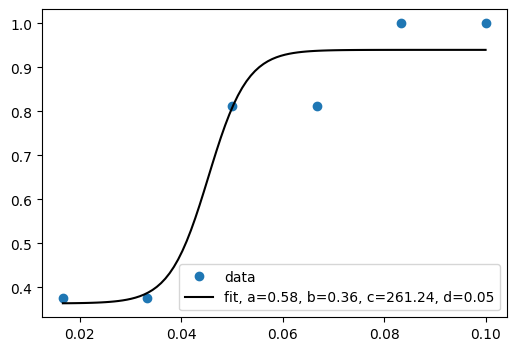

In [45]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(x_fit, y_fit, '-', c="k", label=f"fit, a={np.round(popt[0],2)}, b={np.round(popt[1], 2)}, c={np.round(popt[2], 2)}, d={np.round(popt[3],2)}")
ax.legend()
plt.show()